In [15]:
import pandas as pd
import numpy as np
import sklearn
from sklearn.model_selection import train_test_split
# from sklearn.preprocessing import OneHotEncoder
# from sklearn.impute import SimpleImputer
import seaborn as sns
import matplotlib.pyplot as plt
data = pd.read_csv('../data/data.csv')



data.drop(['CUST_ID','CREDIT_SCORE'], axis=1, inplace=True)
data.drop(['T_EDUCATION_12', 'T_FINES_12', 'T_GAMBLING_12', 'T_HOUSING_12', 'T_TAX_12', 'T_TRAVEL_12', 'T_EDUCATION_6','T_ENTERTAINMENT_6','T_ENTERTAINMENT_12' ,'T_GAMBLING_6','T_GROCERIES_6','T_HOUSING_6','T_EXPENDITURE_12', 'T_EXPENDITURE_6','R_GROCERIES_DEBT', 'INCOME', 'T_UTILITIES_6'], axis=1, inplace=True)
        
data['CAT_GAMBLING'] = data['CAT_GAMBLING'].map({'No': 0, 'High': 2, 'Low': 1})
data.drop(['T_FINES_6', 'R_FINES_INCOME', 'R_FINES_DEBT', 'CAT_GAMBLING', 'CAT_DEBT', 'CAT_MORTGAGE', 'CAT_SAVINGS_ACCOUNT', 'CAT_DEPENDENTS','R_FINES_SAVINGS','CAT_CREDIT_CARD'],axis=1,inplace=True)









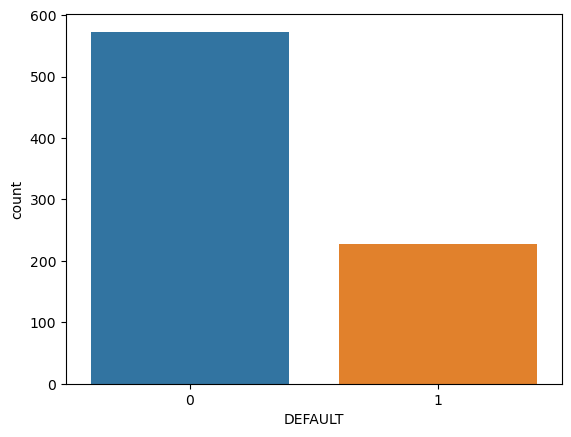

0.39616055846422343


In [16]:
sns.countplot(data,x="DEFAULT")
plt.show()
negative=data[data['DEFAULT']==0].shape[0]

positive=data[data['DEFAULT']==1].shape[0]
imbalance=negative/positive
print(1/imbalance)

In [17]:
data.info()
data['T_TRAVEL_6'].replace(158788, 112871, inplace=True)
data['T_TRAVEL_6'].replace(158046, 112871, inplace=True)
data['T_HEALTH_6'].replace(25322, 17927, inplace=True)
data['T_HEALTH_12'].replace(32654, 26977, inplace=True)

X = data.drop(['DEFAULT'], axis=1)
y = data['DEFAULT']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=420)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 800 entries, 0 to 799
Data columns (total 58 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   SAVINGS                  800 non-null    int64  
 1   DEBT                     800 non-null    int64  
 2   R_SAVINGS_INCOME         800 non-null    float64
 3   R_DEBT_INCOME            800 non-null    float64
 4   R_DEBT_SAVINGS           800 non-null    float64
 5   T_CLOTHING_12            800 non-null    int64  
 6   T_CLOTHING_6             800 non-null    int64  
 7   R_CLOTHING               800 non-null    float64
 8   R_CLOTHING_INCOME        800 non-null    float64
 9   R_CLOTHING_SAVINGS       800 non-null    float64
 10  R_CLOTHING_DEBT          800 non-null    float64
 11  R_EDUCATION              800 non-null    float64
 12  R_EDUCATION_INCOME       800 non-null    float64
 13  R_EDUCATION_SAVINGS      800 non-null    float64
 14  R_EDUCATION_DEBT         8

In [18]:
# from lightgbm import LGBMClassifier
# # import lightgbm as lgb
# # import xgboost as xgb
# from sklearn.metrics import accuracy_score

# # Initialize and train the LGBM model
# lgbm_model = LGBMClassifier(random_state=42)
# lgbm_model.fit(X_train, y_train)

# # Predict and evaluate the model
# y_pred_lgbm = lgbm_model.predict(X_test)
# accuracy_lgbm = accuracy_score(y_test, y_pred_lgbm)
# print(f"LGBM Classifier Accuracy: {accuracy_lgbm}")

In [19]:
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score


xgb_model = XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)
xgb_model.fit(X_train, y_train)

y_pred_xgb = xgb_model.predict(X_test)
accuracy_xgb = accuracy_score(y_test, y_pred_xgb)
print(f"XGBoost Classifier Accuracy: {accuracy_xgb}")


XGBoost Classifier Accuracy: 0.66875


In [20]:
from sklearn.model_selection import GridSearchCV
import xgboost as xgb

param_grid_fixed = {
    'learning_rate': [0.01, 0.1, 0.2],
    'n_estimators': [100, 200, 300],
    'max_depth': [3, 4, 5],
    'subsample': [0.8, 0.9, 1.0],
    'colsample_bytree': [0.8, 0.9, 1.0],
    'min_child_weight': [1, 5, 10],
    'gamma': [0.5, 1, 1.5, 2, 5],
        
        
        
}
param_grid={'colsample_bytree': [0.8], 
              'learning_rate': [0.01], 
              'max_depth': [4], 
              'n_estimators': [100],
              'subsample': [0.9],
              'scale_pos_weight':np.arange(0.1,1.5,0.1)
              }
        

        
        



xgb_clf = xgb.XGBClassifier(use_label_encoder=False, eval_metric='logloss')


grid_search = GridSearchCV(estimator=xgb_clf, param_grid=param_grid, cv=3, scoring='accuracy', verbose=2)


grid_search.fit(X_train, y_train)


print("Best parameters found: ", grid_search.best_params_)
print("Best accuracy found: ", grid_search.best_score_)




Fitting 3 folds for each of 14 candidates, totalling 42 fits
[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=4, n_estimators=100, scale_pos_weight=0.1, subsample=0.9; total time=   0.1s
[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=4, n_estimators=100, scale_pos_weight=0.1, subsample=0.9; total time=   0.1s
[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=4, n_estimators=100, scale_pos_weight=0.1, subsample=0.9; total time=   0.1s
[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=4, n_estimators=100, scale_pos_weight=0.2, subsample=0.9; total time=   0.1s
[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=4, n_estimators=100, scale_pos_weight=0.2, subsample=0.9; total time=   0.1s
[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=4, n_estimators=100, scale_pos_weight=0.2, subsample=0.9; total time=   0.1s
[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=4, n_estimators=100, scale_pos_weight=0.3000000000

In [21]:
best_params ={'colsample_bytree': 0.8, 
              'learning_rate': 0.01, 
              'max_depth': 4, 
              'n_estimators': 100,
              'subsample': 0.9,
              'scale_pos_weight':1
              }

best_params_2={'colsample_bytree': 1.0,
                'gamma': 5,
                'learning_rate': 0.2, 
                'max_depth': 3, 
                'min_child_weight': 10,
                'n_estimators': 200, 
                'subsample': 0.8}




final_model = xgb.XGBClassifier(**best_params, use_label_encoder=False, eval_metric='logloss')


final_model.fit(X_train, y_train)


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.8, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='logloss',
              feature_types=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=0.01, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=4,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=100,
              n_jobs=None, num_parallel_tree=None, random_state=None, ...)

In [22]:
from sklearn.metrics import accuracy_score


y_pred = final_model.predict(X_test)


accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy of the final model on the test set: {accuracy}")
# print(final_model.feature_importances_)
# useless_cols=[]
# print(max(final_model.feature_importances_))
# print(min(final_model.feature_importances_))
# print(np.mean(final_model.feature_importances_))
# for colname,imp in zip(X_train.columns,final_model.feature_importances_):
#     print(colname,imp)
#     if imp<0.00001:
#         useless_cols.append(colname)
    
# print(useless_cols)


Accuracy of the final model on the test set: 0.75625


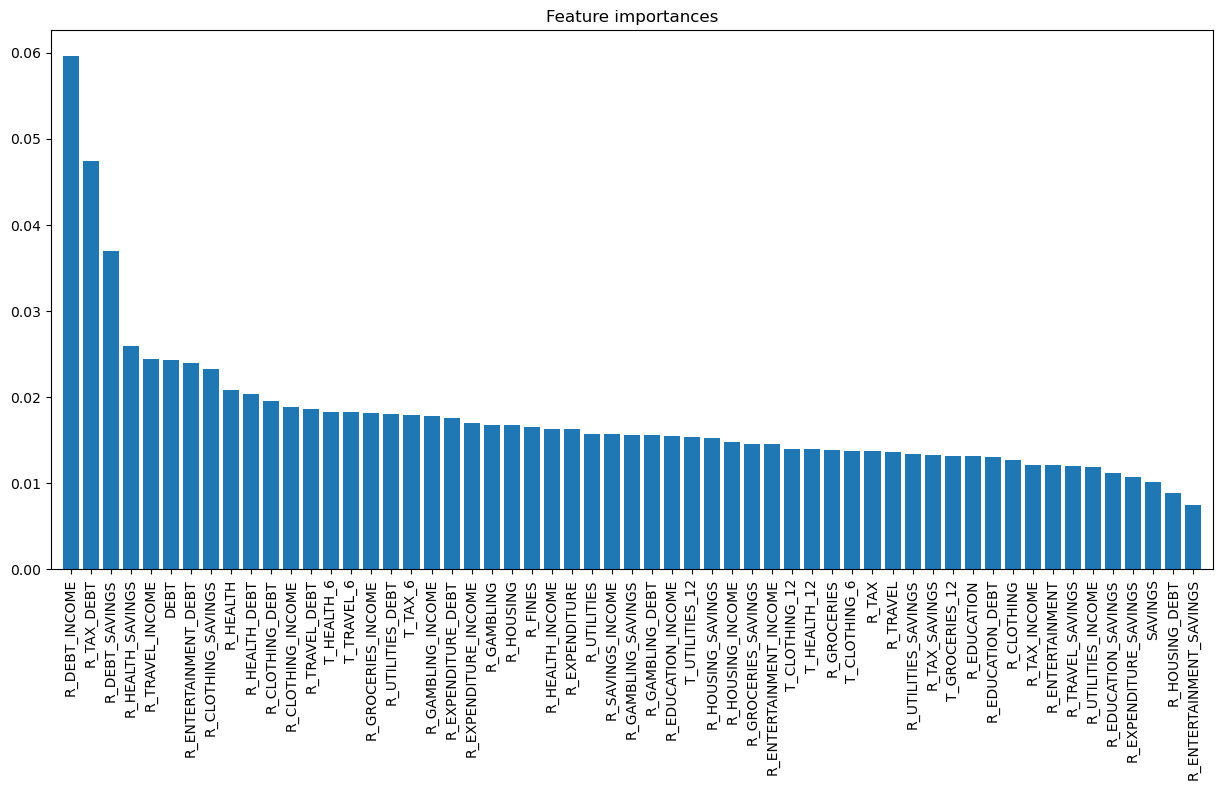

In [23]:
sorted_indices = np.argsort(final_model.feature_importances_)[::-1]
not_important = X.columns[sorted_indices][abs(final_model.feature_importances_[sorted_indices])<0.001]
plt.figure(figsize=(15, 7))
plt.title("Feature importances")
plt.bar(range(X.shape[1]), final_model.feature_importances_[sorted_indices], align="center")
plt.xticks(range(X.shape[1]), X.columns[sorted_indices], rotation=90)
plt.xlim([-1, X.shape[1]])
plt.show()

Trying to implement SMOTE

In [56]:
from imblearn.combine import SMOTEENN
import collections





counter = collections.Counter(y_train)
print('Before', counter)

smenn = SMOTEENN()
X_train_smenn, y_train_smenn = smenn.fit_resample (X_train, y_train)
counter = collections.Counter (y_train_smenn)
print('After', counter)




Before Counter({0: 460, 1: 180})
After Counter({1: 229, 0: 159})


In [36]:
from imblearn.over_sampling import SMOTE

# Create an instance of SMOTE
smote = SMOTE(random_state=42)

# Apply SMOTE to the training data
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)
counter = collections.Counter (y_train_smote)
print('After', counter)


After Counter({0: 460, 1: 460})


In [34]:
final_model.fit(X_train_smote, y_train_smote)


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.8, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='logloss',
              feature_types=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=0.01, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=4,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=100,
              n_jobs=None, num_parallel_tree=None, random_state=None, ...)

In [35]:
y_pred = final_model.predict(X_test)

# Calculate the accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy of the final model on the test set: {accuracy}")

Accuracy of the final model on the test set: 0.56875


The SMOTE method appeared uneffective